In [0]:
import os
import shutil
import tensorflow as tf

In [31]:
!nvidia-smi

Sun Feb 16 09:56:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    25W /  70W |   1635MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [22]:
tf.__version__

'1.15.0'

In [0]:
!python

Python 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> exit()


In [0]:
!pip install keras==2.1.6

     |████████████████████████████████| 348kB 24.4MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


# 1 将图像复制到训练、验证和测试的目录

In [1]:
!pwd

/content


In [0]:
base_dir = r'./drive/My Drive/Data/dogs-vs-cats_small'

In [0]:
os.chdir(path=base_dir)

In [0]:
train_cats_dir = r'./train/cats'
train_dogs_dir = r'./train/dogs'
validation_cats_dir = r'./validation/cats'
validation_dogs_dir = r'./validation/dogs'
test_cats_dir = r'./test/cats'
test_dogs_dir = r'./test/dogs'

In [0]:
# 查看每个分组（训练/验证/测试）中分别包含多少张图像

In [9]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
# 构建网络

In [0]:
from keras import layers
from keras import models

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
# 配置模型

In [0]:
from keras import optimizers

In [19]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])  # acc为分类精度



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# 数据预处理

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_dir = r'./train'
validation_dir = r'./validation'
test_dir = r'./test'

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [28]:
validation_generator = test_datagen.flow_from_directory(directory=validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
# 利用批量生成器拟合模型

In [30]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)




Epoch 1/30





100/100 [==============================] - 1019s 10s/step - loss: 0.6866 - acc: 0.5320 - val_loss: 0.6876 - val_acc: 0.5250
Epoch 2/30
100/100 [==============================] - 10s 104ms/step - loss: 0.6602 - acc: 0.6130 - val_loss: 0.6516 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6227 - acc: 0.6670 - val_loss: 0.6171 - val_acc: 0.6560
Epoch 4/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5789 - acc: 0.7045 - val_loss: 0.6308 - val_acc: 0.6450
Epoch 5/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5363 - acc: 0.7280 - val_loss: 0.5756 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 10s 101ms/step - loss: 0.5051 - acc: 0.7525 - val_loss: 0.5623 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 10s 103ms/step - loss: 0.4795 - acc: 0.7710 - val_loss: 0.5541 - val_acc: 0.7150
Epoch 8/30
100/100 [===========================

In [0]:
# 保存模型

In [0]:
model.save('cats_and_dogs_small_1.h5')

In [0]:
# 使用数据增强

In [0]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [0]:
# 定义一个包含dropout的新卷积神经网络

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150,150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [43]:
validation_generator = test_datagen.flow_from_directory(directory=validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [44]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 32s 316ms/step - loss: 0.6934 - acc: 0.5181 - val_loss: 0.6834 - val_acc: 0.5076
Epoch 2/100
100/100 [==============================] - 29s 292ms/step - loss: 0.6771 - acc: 0.5794 - val_loss: 0.6530 - val_acc: 0.6302
Epoch 3/100
100/100 [==============================] - 29s 285ms/step - loss: 0.6601 - acc: 0.5962 - val_loss: 0.6312 - val_acc: 0.6409
Epoch 4/100
100/100 [==============================] - 29s 286ms/step - loss: 0.6415 - acc: 0.6259 - val_loss: 0.6264 - val_acc: 0.6463
Epoch 5/100
100/100 [==============================] - 27s 275ms/step - loss: 0.6197 - acc: 0.6603 - val_loss: 0.6195 - val_acc: 0.6561
Epoch 6/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6100 - acc: 0.6625 - val_loss: 0.6006 - val_acc: 0.6675
Epoch 7/100
100/100 [==============================] - 29s 285ms/step - loss: 0.6086 - acc: 0.6556 - val_loss: 0.5644 - val_acc: 0.7049
Epoch 8/100
100/100 [===========================

In [0]:
# 保存模型

In [0]:
model.save('cats_and_dogs_small_2.h5')

# 使用预训练的卷积神经网络

## 特征提取

In [0]:
from keras.applications import VGG16

In [48]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))  # 只需要卷积基

58892288/58889256 [==============================] - 2s 0us/step


In [49]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### 不使用数据增强的快速特征提取

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

In [0]:
batch_size = 20

In [0]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory=directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [55]:
train_features, train_labels = extract_features(directory=train_dir, sample_count=2000)
validation_features, validation_labels = extract_features(directory=validation_dir, sample_count=1000)
test_features, test_labels = extract_features(directory=test_dir, sample_count=1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [0]:
model = models.Sequential()
model.add(layers.Dense(units=256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [60]:
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 464us/step - loss: 0.6158 - acc: 0.6535 - val_loss: 0.4409 - val_acc: 0.8350
Epoch 2/30
2000/2000 [==============================] - 1s 297us/step - loss: 0.4335 - acc: 0.7985 - val_loss: 0.3667 - val_acc: 0.8580
Epoch 3/30
2000/2000 [==============================] - 1s 314us/step - loss: 0.3618 - acc: 0.8450 - val_loss: 0.3240 - val_acc: 0.8780
Epoch 4/30
2000/2000 [==============================] - 1s 319us/step - loss: 0.3176 - acc: 0.8660 - val_loss: 0.2998 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 1s 289us/step - loss: 0.2828 - acc: 0.8830 - val_loss: 0.2849 - val_acc: 0.8900
Epoch 6/30
2000/2000 [==============================] - 1s 285us/step - loss: 0.2702 - acc: 0.8935 - val_loss: 0.2975 - val_acc: 0.8680
Epoch 7/30
2000/2000 [==============================] - 1s 279us/step - loss: 0.2534 - acc: 0.9010 - val_loss: 0.2697 - val_acc: 0.8930


## 使用数据增强的特征提取

###  在卷积基上添加一个密集连接分类器

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [64]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [66]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4


### 利用冻结的卷积基端到端地训练模型

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [0]:
test_datagen = ImageDataGenerator(rescale=1.255)  # 注意，不能增强验证数据

In [70]:
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(directory=validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [72]:
model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 22s 219ms/step - loss: 0.5830 - acc: 0.6930 - val_loss: 4.6060 - val_acc: 0.6770
Epoch 2/30
100/100 [==============================] - 19s 189ms/step - loss: 0.4736 - acc: 0.7870 - val_loss: 4.0607 - val_acc: 0.7200
Epoch 3/30
100/100 [==============================] - 19s 190ms/step - loss: 0.4309 - acc: 0.8080 - val_loss: 3.4591 - val_acc: 0.7590
Epoch 4/30
100/100 [==============================] - 20s 196ms/step - loss: 0.3990 - acc: 0.8270 - val_loss: 3.1605 - val_acc: 0.7810
Epoch 5/30
100/100 [==============================] - 19s 192ms/step - loss: 0.3772 - acc: 0.8345 - val_loss: 2.9109 - val_acc: 0.8020
Epoch 6/30
100/100 [==============================] - 19s 193ms/step - loss: 0.3720 - acc: 0.8365 - val_loss: 2.8884 - val_acc: 0.8030
Epoch 7/30
100/100 [==============================] - 19s 192ms/step - loss: 0.3584 - acc: 0.8355 - val_loss: 2.7605 - val_acc: 0.8140
Epoch 8/30
100/100 [==============================] - 1

In [0]:
# 保存模型

In [0]:
model.save('cats_and_dogs_small_3.h5')

# 微调模型

In [0]:
# 另一种广泛使用的模型复用方法是模型微调(fine-tuning)，与特征提取互为补充
# 做完特征提取后先解冻conv_base，然后冻结其中的部分层

In [76]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
conv_base.trainable = True

In [0]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

In [80]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 22s 217ms/step - loss: 0.2897 - acc: 0.8765 - val_loss: 3.0292 - val_acc: 0.8050
Epoch 2/100
100/100 [==============================] - 20s 195ms/step - loss: 0.2591 - acc: 0.8860 - val_loss: 2.9972 - val_acc: 0.8070
Epoch 3/100
100/100 [==============================] - 20s 198ms/step - loss: 0.2375 - acc: 0.9020 - val_loss: 3.0286 - val_acc: 0.8030
Epoch 4/100
100/100 [==============================] - 20s 196ms/step - loss: 0.2234 - acc: 0.9100 - val_loss: 3.4246 - val_acc: 0.7810
Epoch 5/100
100/100 [==============================] - 20s 196ms/step - loss: 0.2010 - acc: 0.9225 - val_loss: 2.7315 - val_acc: 0.8260
Epoch 6/100
100/100 [==============================] - 20s 202ms/step - loss: 0.2066 - acc: 0.9120 - val_loss: 2.9339 - val_acc: 0.8120
Epoch 7/100
100/100 [==============================] - 20s 198ms/step - loss: 0.1867 - acc: 0.9230 - val_loss: 3.3034 - val_acc: 0.7880
Epoch 8/100
100/100 [===========================

In [0]:
# 模型保存

In [0]:
model.save('cats_and_dogs_small_4.h5')

In [0]:
# 绘图验证结果

In [0]:
import matplotlib.pyplot as plt

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(len(acc))

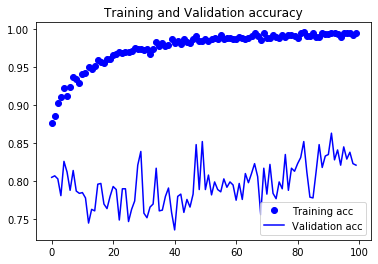

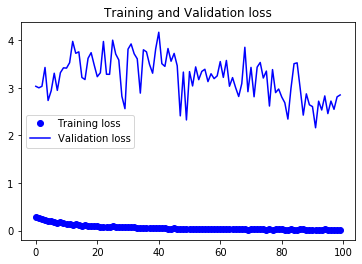

In [88]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [0]:
# 使图像变得更加平滑

In [0]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

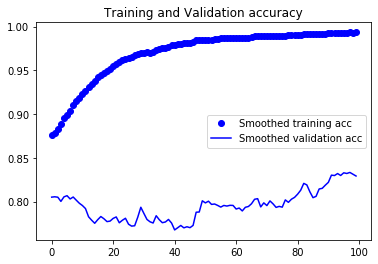

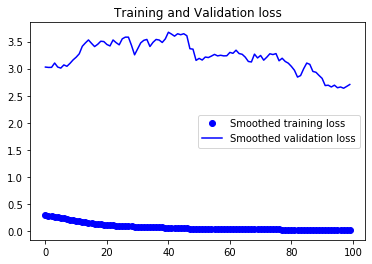

In [93]:
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# 评估模型

In [94]:
test_generator = test_datagen.flow_from_directory(directory=test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

In [96]:
test_loss

2.859470534113344

In [97]:
test_acc

0.8189999997615814